# Radhika Ambulkar
data analyst intern duration : 1 August 2024 to 30 September 2024

# This is my second internship project at Next24tech Technology and Services. This project deals with the e commerce product recommendation system using data analytics and ML algorithm.
The dataset contains 1465 entries and 16 columns, primarily focused on product information, user reviews, and pricing data. Here's a breakdown of the columns:

1. **product_id**: Unique identifier for the product.
2. **product_name**: The name of the product.
3. **category**: Product categories.
4. **discounted_price**: The discounted price of the product.
5. **actual_price**: The original price of the product.
6. **discount_percentage**: The discount percentage.
7. **rating**: The product rating.
8. **rating_count**: The number of ratings the product has received.
9. **about_product**: Product description or key features.
10. **user_id**: The user who reviewed the product.
11. **user_name**: Name of users who reviewed the product.
12. **review_id**: Review ID associated with each user review.
13. **review_title**: Title of the user review.
14. **review_content**: Content of the user review.
15. **img_link**: Link to the product image.
16. **product_link**: Link to the product page.

### Step-by-Step Process to Develop the E-Commerce Recommendation System

#### 1. **Data Preprocessing**
   - **Convert price columns** (`discounted_price`, `actual_price`) into numerical values by removing currency symbols.
   - **Handle missing values**: Clean columns like `rating_count`, which may have missing data.
   - **Convert ratings** to float.
   - **Create interaction matrix** for users and products using `user_id` and `product_id`.

#### 2. **Exploratory Data Analysis (EDA)**
   - Analyze product popularity, ratings, and sales trends.
   - Understand user interaction with products based on reviews and ratings.

#### 3. **Recommendation System Approaches**
   - **Collaborative Filtering**:
     - Based on user-product interactions (using `user_id`, `product_id`, and ratings).
   - **Content-Based Filtering**:
     - Recommend products based on product attributes (like `category`, `about_product`).

#### 4. **Model Training**
   - Train the model using algorithms like **Matrix Factorization (SVD)** or **KNN** for collaborative filtering.
   - For content-based, use similarity measures like **TF-IDF** or **Cosine Similarity** on the product descriptions.

#### 5. **Evaluation**
   - Use metrics like **Precision@K** or **Recall@K** to evaluate the system’s recommendations.
   - A/B test the recommendations in a real environment to assess performance.




In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import pairwise_distances
from scipy.sparse import csr_matrix

In [2]:
df = pd.read_csv('amazon.csv')

In [3]:
print(df.shape)

(1465, 16)


In [5]:
print(df.head())

   product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                                            category discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...             ₹399   
1  Computers&Accessories|Accessories&Peripherals|...             ₹199   
2  Computers&Accessories|Accessories&Peripherals|...             ₹199   
3  Computers&Accessories|Accessories&Peripherals|...             ₹329   
4  Computers&Accessories|Accessories&Peripherals|...             ₹154   

  actual_price discount_percentage rating rating_count  \
0       ₹1,099                 64%    4.2       24,269   
1         ₹349                 43%  

In [6]:
print(df.tail())

      product_id                                       product_name  \
1460  B08L7J3T31  Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...   
1461  B01M6453MB  Prestige Delight PRWO Electric Rice Cooker (1 ...   
1462  B009P2LIL4  Bajaj Majesty RX10 2000 Watts Heat Convector R...   
1463  B00J5DYCCA  Havells Ventil Air DSP 230mm Exhaust Fan (Pist...   
1464  B01486F4G6  Borosil Jumbo 1000-Watt Grill Sandwich Maker (...   

                                               category discounted_price  \
1460  Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...             ₹379   
1461  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...           ₹2,280   
1462  Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...           ₹2,219   
1463  Home&Kitchen|Heating,Cooling&AirQuality|Fans|E...           ₹1,399   
1464  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...           ₹2,863   

     actual_price discount_percentage rating rating_count  \
1460         ₹919                 59%      4        1,0

In [7]:
print(df.describe())

        product_id                                       product_name  \
count         1465                                               1465   
unique        1351                                               1337   
top     B07JW9H4J1  Fire-Boltt Ninja Call Pro Plus 1.83" Smart Wat...   
freq             3                                                  5   

                                                 category discounted_price  \
count                                                1465             1465   
unique                                                211              550   
top     Computers&Accessories|Accessories&Peripherals|...             ₹199   
freq                                                  233               53   

       actual_price discount_percentage rating rating_count  \
count          1465                1465   1465         1463   
unique          449                  92     28         1143   
top            ₹999                 50%    4.1        

In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [10]:
print("No of null values :\n",df.isnull().sum())
hdata = df.dropna()
print("No of null values after removing :\n",df.isnull().sum())

No of null values :
 product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64
No of null values after removing :
 product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64


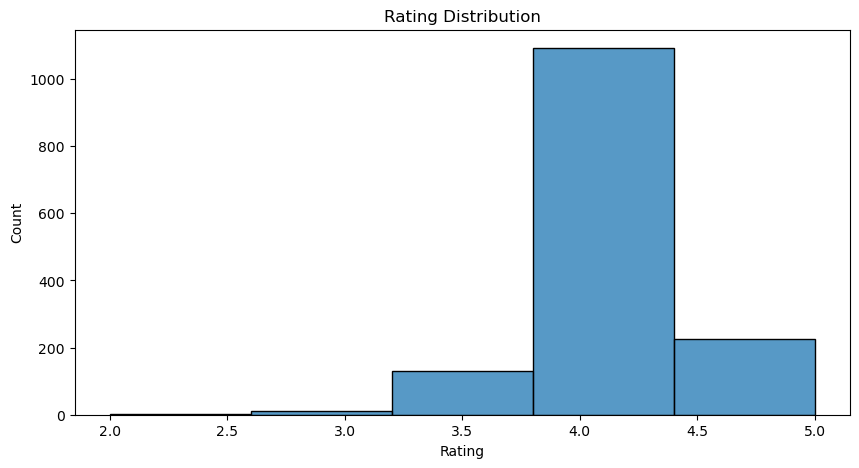

In [47]:
plt.figure(figsize=(10, 5))
sns.histplot(df['rating'], bins=5, kde=False)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

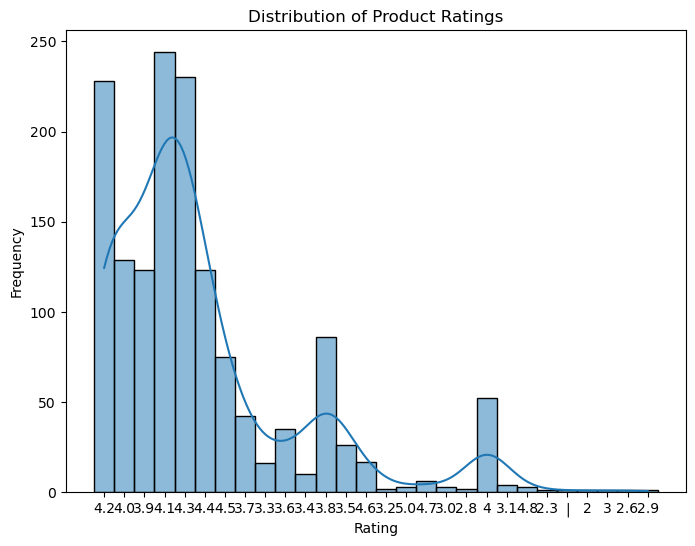

In [11]:
plt.figure(figsize=(8, 6))
sns.histplot(df['rating'], bins=20, kde=True)
plt.title('Distribution of Product Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

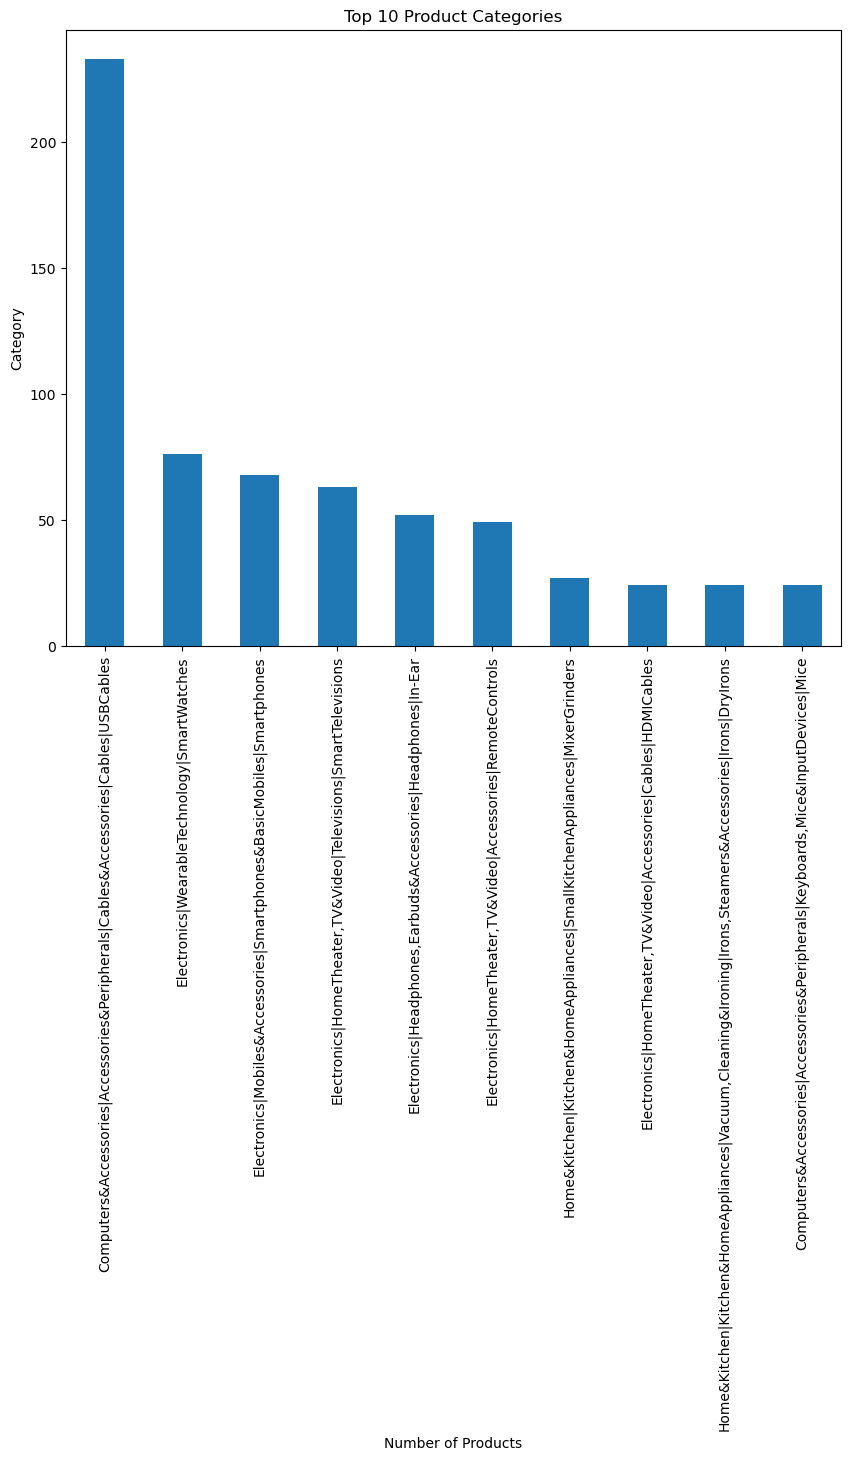

In [13]:
plt.figure(figsize=(10, 8))
df['category'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Product Categories')
plt.xlabel('Number of Products')
plt.ylabel('Category')
plt.show()

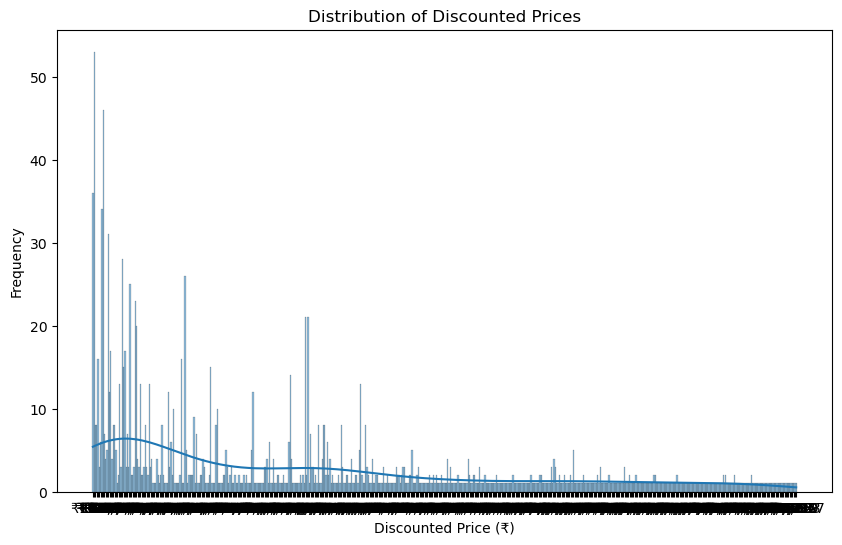

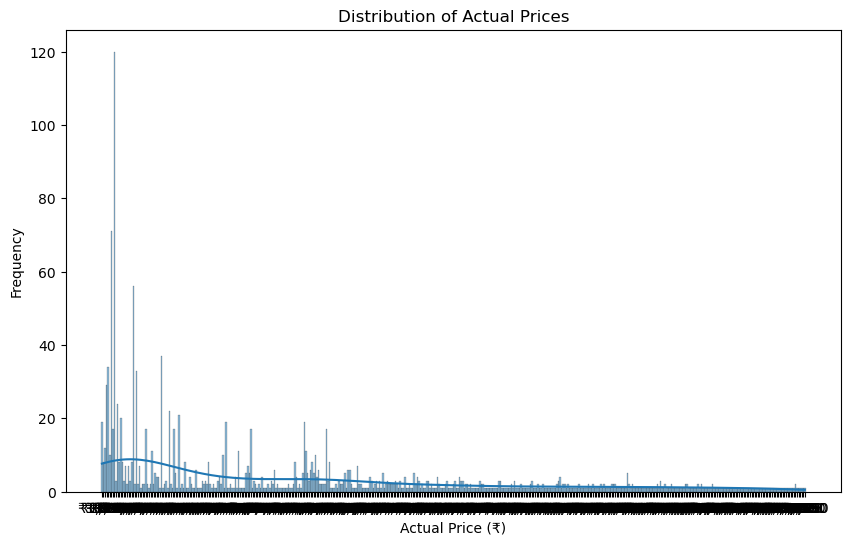

In [14]:
# Distribution of Discounted Prices
plt.figure(figsize=(10, 6))
sns.histplot(df['discounted_price'], bins=30, kde=True)
plt.title('Distribution of Discounted Prices')
plt.xlabel('Discounted Price (₹)')
plt.ylabel('Frequency')
plt.show()

# Distribution of Actual Prices
plt.figure(figsize=(10, 6))
sns.histplot(df['actual_price'], bins=30, kde=True)
plt.title('Distribution of Actual Prices')
plt.xlabel('Actual Price (₹)')
plt.ylabel('Frequency')
plt.show()


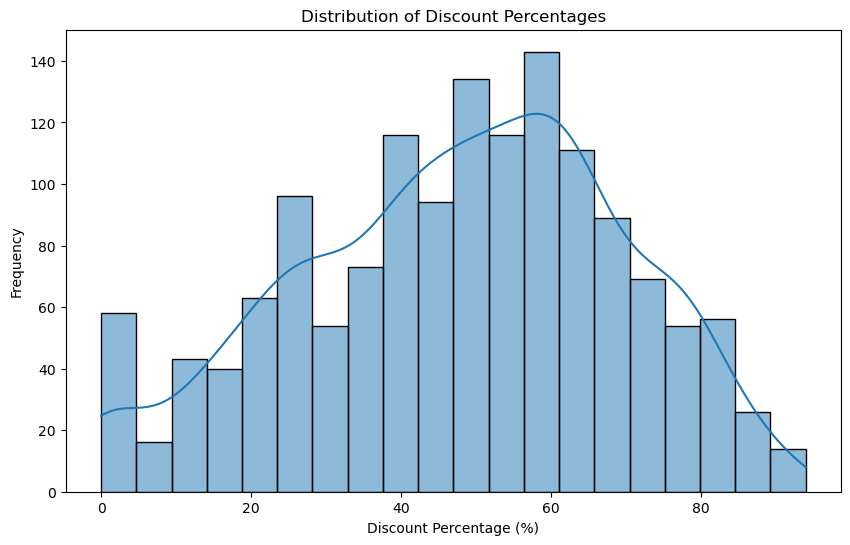

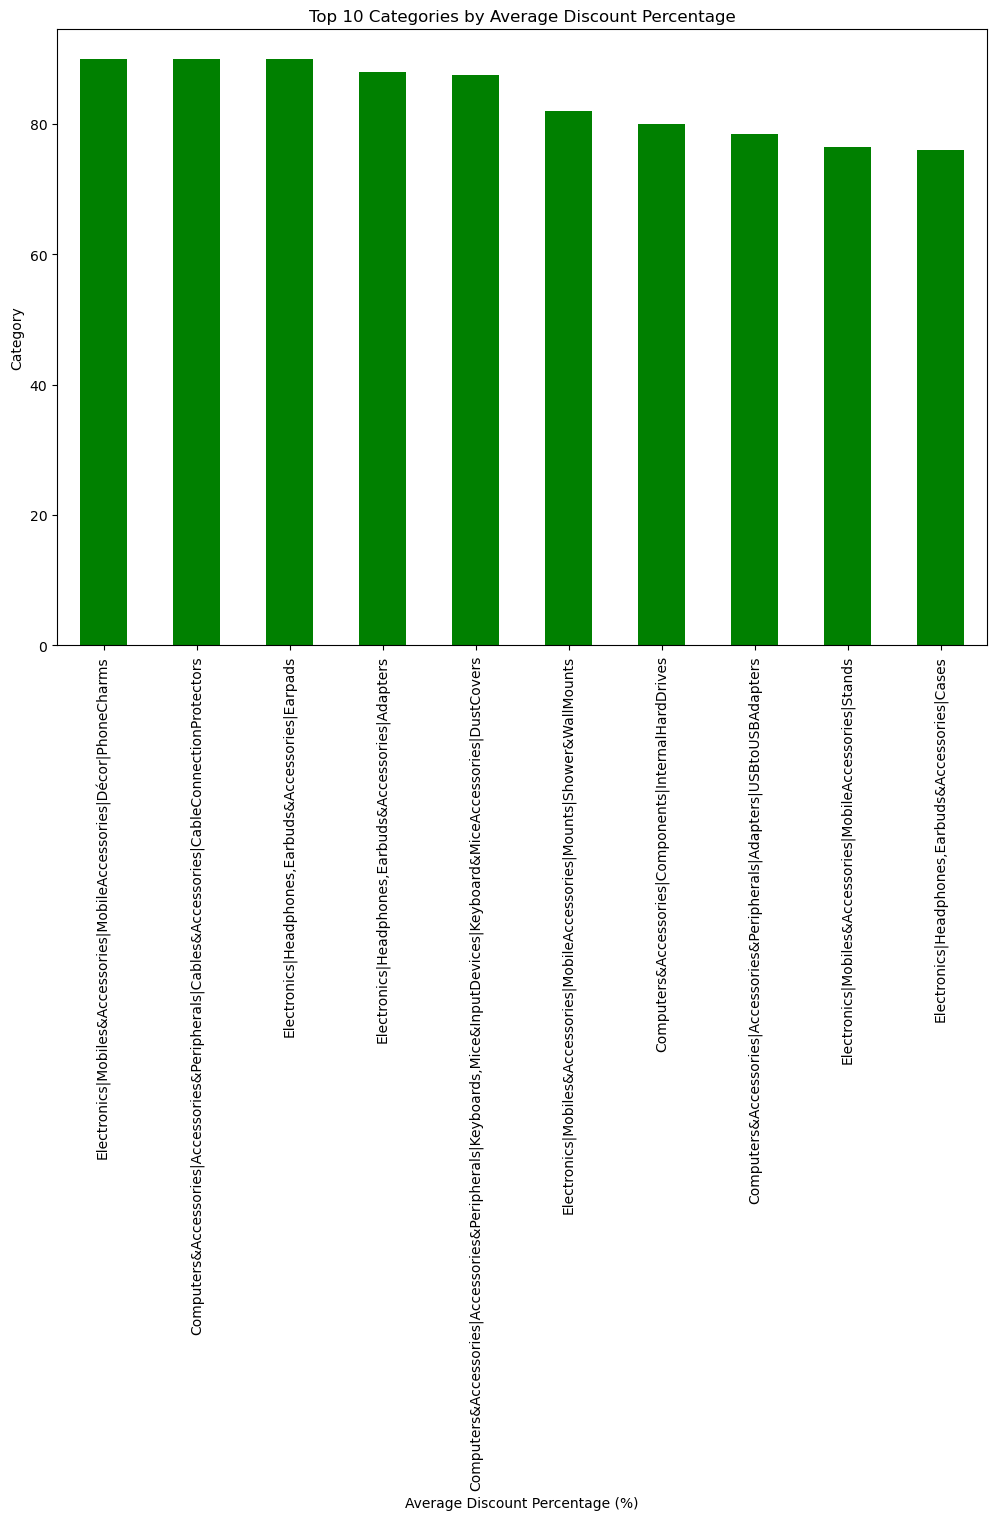

In [17]:
# Convert discount_percentage to numeric after removing the '%'
df['discount_percentage'] = df['discount_percentage'].replace({'%': ''}, regex=True).astype(float)

# Distribution of Discount Percentages
plt.figure(figsize=(10, 6))
sns.histplot(df['discount_percentage'], bins=20, kde=True)
plt.title('Distribution of Discount Percentages')
plt.xlabel('Discount Percentage (%)')
plt.ylabel('Frequency')
plt.show()

# Average discount by product category
category_discount = df.groupby('category')['discount_percentage'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
category_discount.head(10).plot(kind='bar', color='green')
plt.title('Top 10 Categories by Average Discount Percentage')
plt.xlabel('Average Discount Percentage (%)')
plt.ylabel('Category')
plt.show()


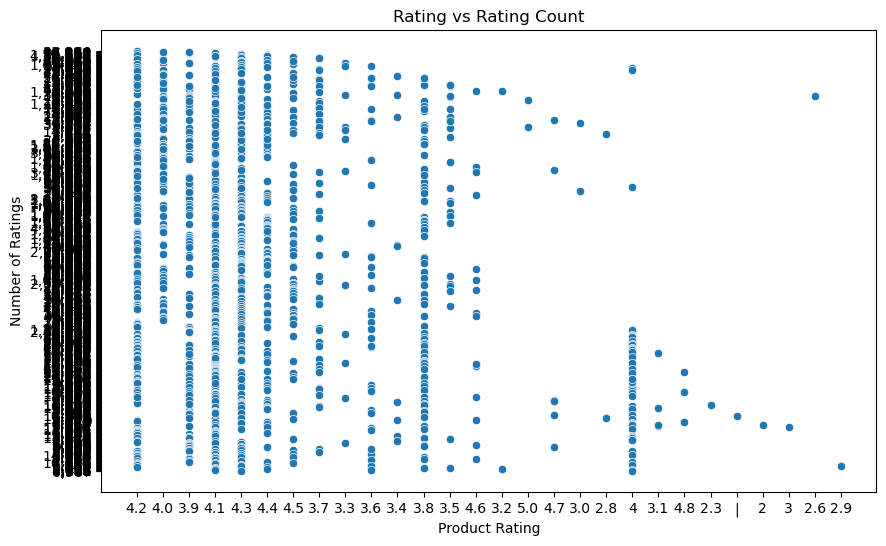

In [27]:
# Scatter plot: Rating vs Rating Count
plt.figure(figsize=(10, 6))
sns.scatterplot(x='rating', y='rating_count', data=df)
plt.title('Rating vs Rating Count')
plt.xlabel('Product Rating')
plt.ylabel('Number of Ratings')
plt.show()



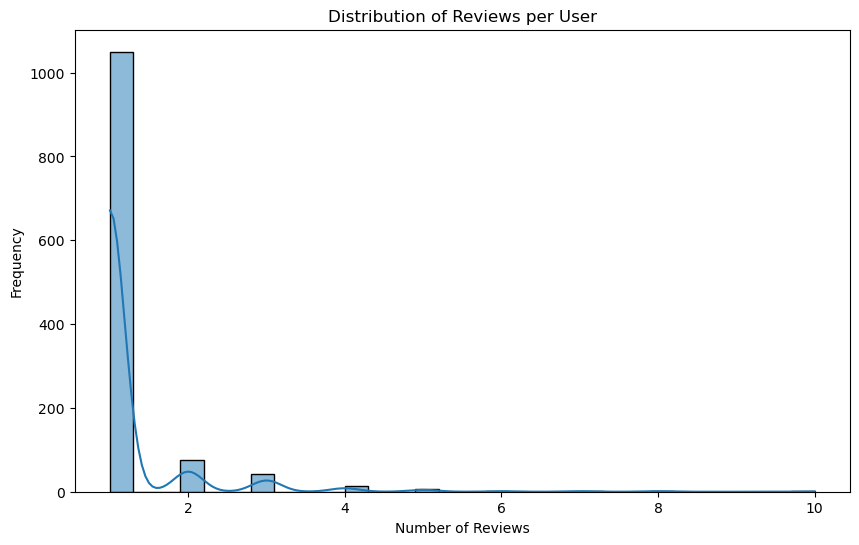

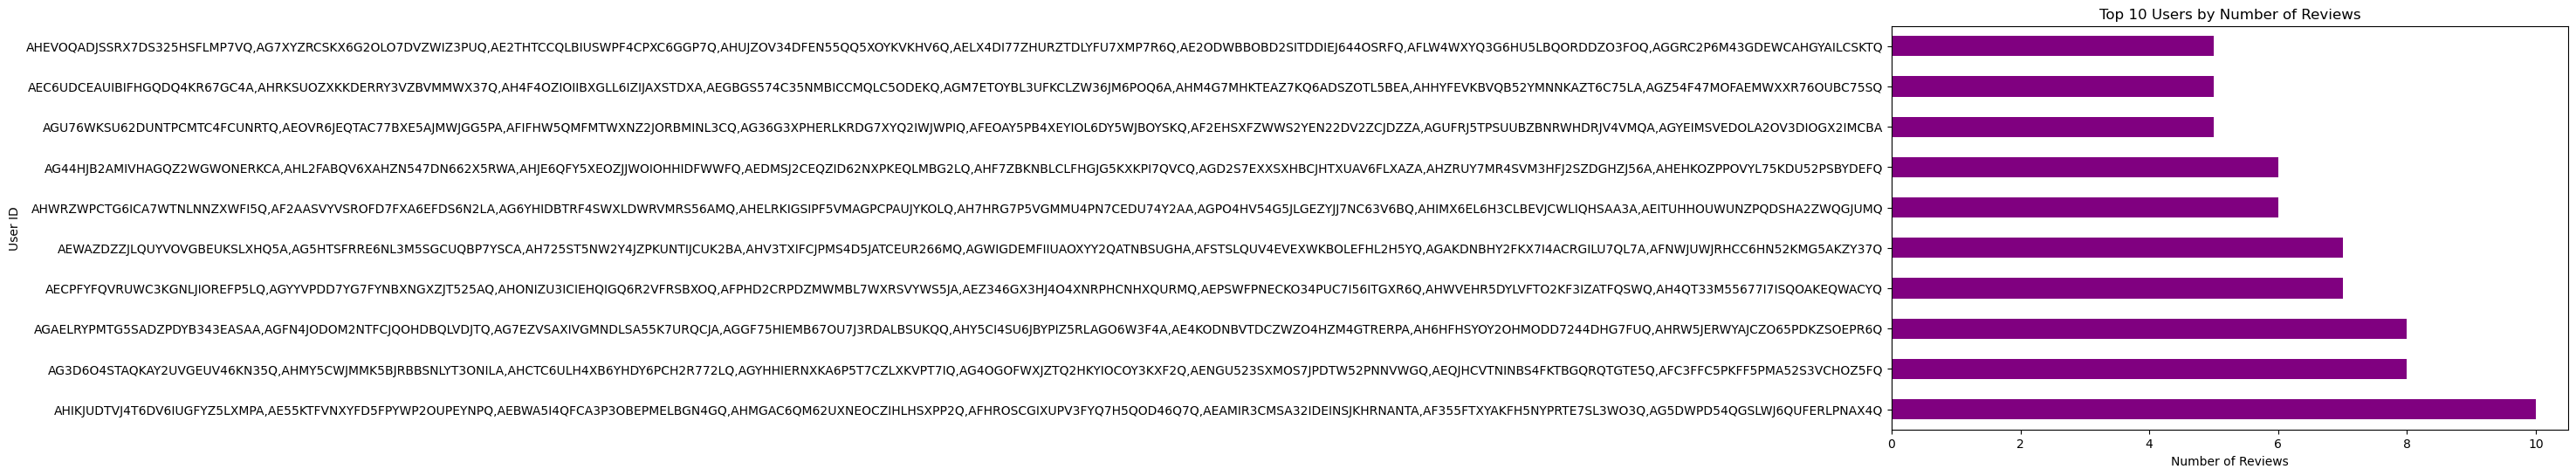

In [23]:
# Number of reviews per user
reviews_per_user = df.groupby('user_id')['review_id'].count()
plt.figure(figsize=(10, 6))
sns.histplot(reviews_per_user, bins=30, kde=True)
plt.title('Distribution of Reviews per User')
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')
plt.show()

# Top users by the number of reviews
top_users = reviews_per_user.sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
top_users.plot(kind='barh', color='purple')
plt.title('Top 10 Users by Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('User ID')
plt.show()


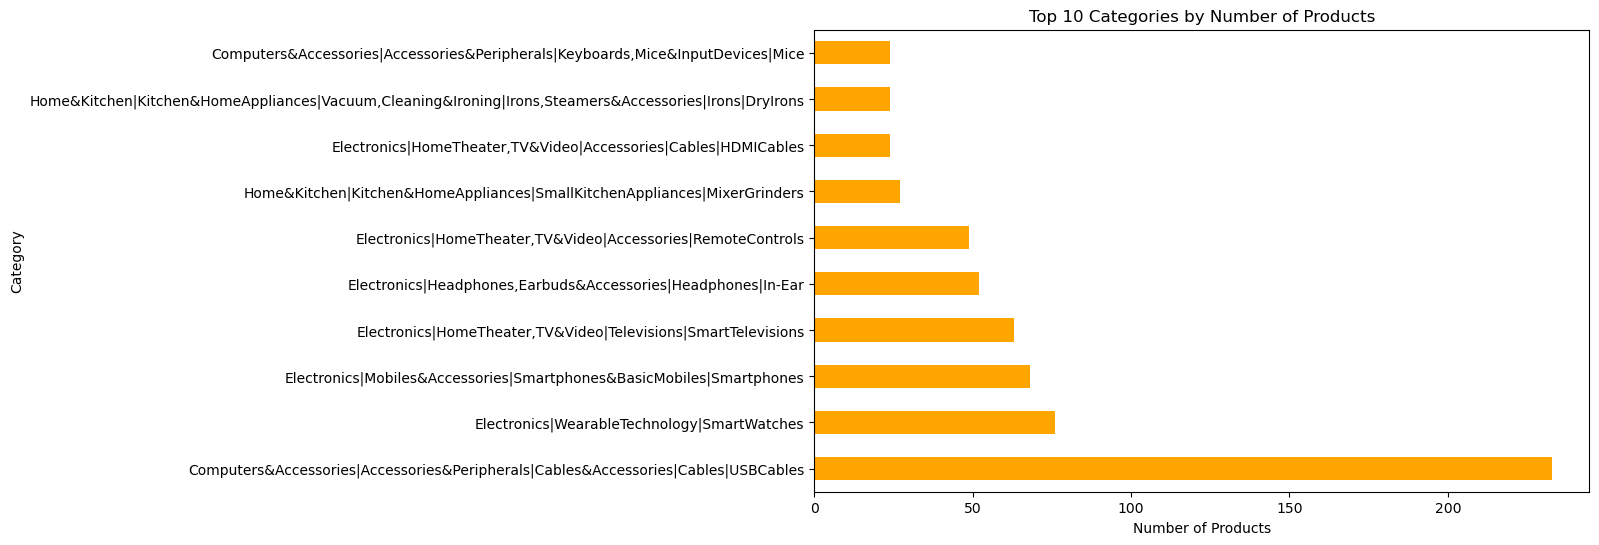

In [29]:
# Count of products per category
plt.figure(figsize=(10, 6))
df['category'].value_counts().head(10).plot(kind='barh', color='orange')
plt.title('Top 10 Categories by Number of Products')
plt.xlabel('Number of Products')
plt.ylabel('Category')
plt.show()



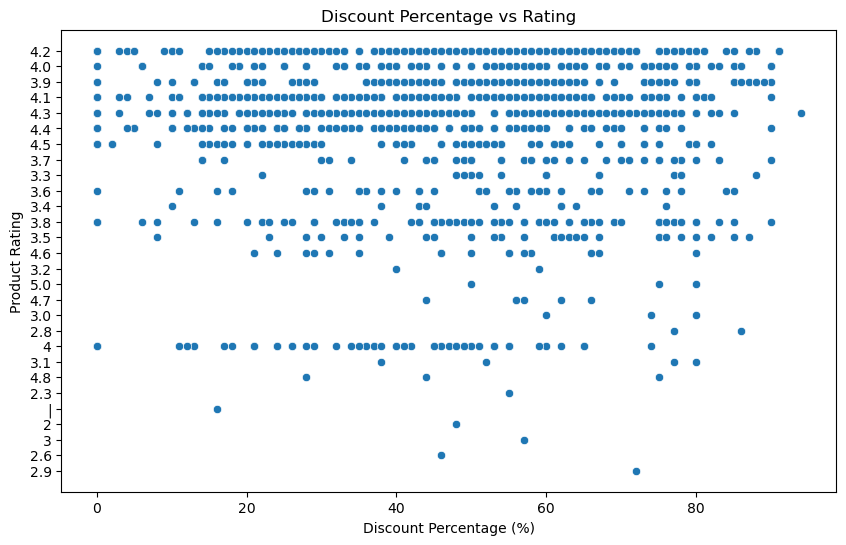

In [31]:
# Scatter plot: Discount Percentage vs Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x='discount_percentage', y='rating', data=df)
plt.title('Discount Percentage vs Rating')
plt.xlabel('Discount Percentage (%)')
plt.ylabel('Product Rating')
plt.show()



In [36]:
# Check the unique values in price-related columns before conversion
print("Unique values in 'discounted_price' before conversion:")
print(df['discounted_price'].unique())

print("Unique values in 'actual_price' before conversion:")
print(df['actual_price'].unique())

# Now, perform the conversion
df['discounted_price'] = df['discounted_price'].replace({'₹': '', ',': ''}, regex=True).astype(float)
df['actual_price'] = df['actual_price'].replace({'₹': '', ',': ''}, regex=True).astype(float)

# Check for unique values in rating_count and rating before conversion
print("Unique values in 'rating_count' before conversion:")
print(df['rating_count'].unique())

print("Unique values in 'rating' before conversion:")
print(df['rating'].unique())

# Replace commas and N/A values in rating_count and rating
df['rating_count'] = df['rating_count'].replace({',': ''}, regex=True).astype(float)
# Check the data type of the 'rating' column
print("Data type of 'rating':", df['rating'].dtype)

# Print unique values to inspect the actual entries in the 'rating' column
print("Unique values in 'rating' before replacement:")
print(df['rating'].unique())

# Check for any remaining NaN values
print("Missing values in 'rating':", df['rating'].isnull().sum())
print("Missing values in 'rating_count':", df['rating_count'].isnull().sum())

# Drop rows where rating or rating_count are missing
df = df.dropna(subset=['rating', 'rating_count'])

# Final check after data cleaning
print("Data after cleaning:")
df.info()



Unique values in 'discounted_price' before conversion:
[3.99000e+02 1.99000e+02 3.29000e+02 1.54000e+02 1.49000e+02 1.76630e+02
 2.29000e+02 4.99000e+02 2.99000e+02 2.19000e+02 3.50000e+02 1.59000e+02
 3.49000e+02 1.39990e+04 2.49000e+02 1.34900e+04 9.70000e+02 2.79000e+02
 5.90000e+01 1.14990e+04 1.49990e+04 1.79000e+02 3.89000e+02 5.99000e+02
 9.90000e+01 8.99000e+02 3.29990e+04 2.09000e+02 1.99990e+04 9.99000e+02
 3.33000e+02 5.07000e+02 3.09000e+02 1.19900e+03 7.99000e+02 6.99900e+03
 2.30000e+02 6.49000e+02 1.59990e+04 3.48000e+02 3.29900e+04 1.39000e+02
 2.63000e+02 7.99900e+03 1.59900e+03 2.69990e+04 1.15000e+02 1.09010e+04
 1.43400e+03 7.29900e+03 3.25000e+02 2.99990e+04 2.79990e+04 3.09900e+04
 2.69000e+02 2.49990e+04 1.89900e+04 2.90000e+02 3.45000e+02 1.09900e+03
 7.19000e+02 8.49000e+02 2.19990e+04 4.49000e+02 3.79990e+04 7.39000e+03
 2.73100e+02 1.59900e+04 2.10000e+02 1.29900e+03 3.47000e+02 2.28000e+02
 1.49900e+03 8.49900e+03 2.09900e+04 9.99900e+03 4.89000e+02 2.39990e

In [39]:
#Collaborative Filtering
from scipy.sparse import csr_matrix
from sklearn.metrics.pairwise import cosine_similarity

df['user_id'] = df['user_id'].astype(str)
df['product_id'] = df['product_id'].astype(str)
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Drop rows with NaN ratings
df = df.dropna(subset=['rating'])

# Create user-item interaction matrix (rows are user_id, columns are product_id)
interaction_matrix = df.pivot_table(index='user_id', columns='product_id', values='rating', aggfunc='mean').fillna(0)

# Create a sparse matrix for efficiency
interaction_sparse = csr_matrix(interaction_matrix.values)

# Compute cosine similarity between users
user_similarity = cosine_similarity(interaction_sparse)

# Function to recommend products for a user
def recommend_products(user_id, num_recommendations=5):
    if user_id not in interaction_matrix.index:
        return f"User {user_id} not found in the interaction matrix."
    
    user_idx = interaction_matrix.index.get_loc(user_id)
    similarity_scores = user_similarity[user_idx]
    similar_users = np.argsort(-similarity_scores)[1:num_recommendations + 1]
    
    similar_users_ids = interaction_matrix.index[similar_users]
    
    recommended_products = set()
    for similar_user in similar_users_ids:
        user_products = df[df['user_id'] == similar_user]['product_id'].values
        recommended_products.update(user_products)  # Use update to avoid duplicates
    
    if len(recommended_products) == 0:
        return f"No recommendations available for user {user_id}."
    
    return list(recommended_products)[:num_recommendations]

# Example: Recommend products for a specific user
recommendations = recommend_products(user_id='A3J6QE9GDHUJ7D', num_recommendations=5)
print(recommendations)

User A3J6QE9GDHUJ7D not found in the interaction matrix.


C:\Users\DELL\AppData\Local\Temp\ipykernel_10748\2169040388.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['user_id'] = df['user_id'].astype(str)
C:\Users\DELL\AppData\Local\Temp\ipykernel_10748\2169040388.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['product_id'] = df['product_id'].astype(str)
C:\Users\DELL\AppData\Local\Temp\ipykernel_10748\2169040388.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

In [43]:
#Content-Based Filtering
from sklearn.feature_extraction.text import TfidfVectorizer

# Use TF-IDF on product descriptions (about_product column)
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
tfidf_matrix = tfidf.fit_transform(df['about_product'])

# Compute cosine similarity between products based on descriptions
product_similarity = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Function to recommend products based on content
def content_based_recommendation(product_id, num_recommendations=5):
    product_idx = df[df['product_id'] == product_id].index[0]
    similarity_scores = product_similarity[product_idx]
    similar_products = np.argsort(-similarity_scores)[1:num_recommendations+1]
    
    recommended_product_ids = df.iloc[similar_products]['product_id'].values
    return recommended_product_ids

# Example: Recommend products similar to a specific product
content_based_recommendation(product_id='B07JW9H4J1', num_recommendations=5)



array(['B07JW9H4J1', 'B07JW9H4J1', 'B07JH1CBGW', 'B07JH1C41D',
       'B07JW1Y6XV'], dtype=object)

In [60]:
# Define the minimum ratings thresholds
min_user_ratings = 5
min_product_ratings = 5
num_recommendations = 5  # Define the number of recommendations you want

# Count ratings for users and products
user_counts = df['user_id'].value_counts()
product_counts = df['product_id'].value_counts()

# Filter users and products based on the minimum ratings
filtered_users = user_counts[user_counts >= min_user_ratings].index
filtered_products = product_counts[product_counts >= min_product_ratings].index

# Create a filtered DataFrame
df_filtered = df[df['user_id'].isin(filtered_users) & df['product_id'].isin(filtered_products)]

# Ensure df_filtered is not empty
if not df_filtered.empty:
    # Get the most popular products
    popular_products = df_filtered['product_id'].value_counts().head(num_recommendations).index
    print("Most popular products:", popular_products.tolist())
else:
    print("No products found after filtering.")

# Import required libraries
from sklearn.metrics.pairwise import cosine_similarity

# Assuming you have already created the interaction_sparse matrix
# Calculate cosine similarity, which supports sparse matrices
user_similarity = cosine_similarity(interaction_sparse)

# Define your recommendation function here if you haven't already
# ...

# Proceed with the evaluation of the model
precision, recall = evaluate_model(recommend_products, test_matrix, num_recommendations)


No products found after filtering.


In [61]:
# Basic functionality test
sample_user_id = train_data['user_id'].sample(1).iloc[0]  # Randomly select a user
print(f"Recommended products for user {sample_user_id}:")
print(recommend_products(user_id=sample_user_id, num_recommendations=5))

# Recommendations for first 5 users in the training set
for user_id in train_data['user_id'].unique()[:5]:
    print(f"Recommendations for {user_id}: {recommend_products(user_id=user_id, num_recommendations=5)}")


Recommended products for user AGTBGMKWQPUZJ2GA2XPICHD2VTKQ,AF3TVTF3FVMHGLCA2QB2GTUTCUIQ,AH52X5G5PGIEWVC5D7TPBTTVJR2A,AEA6UPUVSSMVOTGA6JN7GFG2AZ7A,AEDU5UVD5ZMYRMBTNQTU7QUFLDVQ,AF4VLR2GRW5ZRKW5QXT6IB6QVLOQ,AESB32BXL4JEWHLRLUHZEDXYSDXQ,AFYSLM4L6FC755CARUNV6FXNANLA:
['B0BLV1GNLN', 'B0BMGG6NKT', 'B0BMGB3CH9', 'B0B4SJKRDF', 'B07ZR4S1G4']
Recommendations for AHFKBN3ZZECQJAP2WEVEDSPH67CQ,AGKAHQZZVWL46MMG723MEZ2B5JXQ,AG77YVKGFFYDUVVPDE2TNAYYMKOA,AFEVFMYDEJHU4LZC5NIFNHXIBTHA,AFZFVBUJXA6PBKJ2FDOYPBEACFKA,AFSZBGFWEAXEDMC4FY3MQB43MSBQ,AGO5KIAIKOB2PPLPFLDLLDMGBQAA,AGY7KGVDNN7DDK5MP4CKRINLVGIA: ['B0B296NTFV', 'B0BLV1GNLN', 'B0BMGG6NKT', 'B0BMGB3CH9', 'B07ZR4S1G4']
Recommendations for AFIVMGZO74QYOK7KXVJMFH36PTPA,AEILB3YJC5WD4FNH2SCVAGPRDRBA,AEOCPQRJLJDQSJTXD4NVM6LYDWLA,AFHPT2SC2FCLRFYAXBVAYHGPFA6Q,AHDEBPMFVRVWVX6O4KIOLHJ743AA,AEHTBYQI7XPSICO42RVPPDG6GYAA,AGZFM5HJWJ6EYQ5AKAXM22NAPRLQ,AHFUCGQIN5PXICCP3SSBXKBIMIIQ: ['B0B296NTFV', 'B0BLV1GNLN', 'B0BMGG6NKT', 'B0BMGB3CH9', 'B0B4SJKRDF']
Recommendations fo